In [192]:
import pandas as pd
import numpy as np
import os

### Merge 12 months of sales data

In [193]:
files = [file for file in os.listdir('./Sales_Data')]

merged_sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    merged_sales_data = pd.concat([merged_sales_data,df])

merged_sales_data.to_csv("final_data.csv", index=False)


### Read data in single dataframe

In [194]:
data = pd.read_csv("final_data.csv")
data.shape

(186850, 6)

In [195]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning

In [196]:
nan_count = data.isna().sum()
print(nan_count)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [197]:
nan_rows = data[data.isna().any(axis=1)]
nan_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


##### As there are complete rows with NaN values, we can drop them together

In [198]:
data=data.dropna()
data.shape

(186305, 6)

##### Correcting columns data types as per the requirement

### Adding additional information columns to data

##### Certain values in Order Date has value "Order Date" which cannot be converted to integer for creating the month column

In [199]:
temp_data = data[data['Order Date'].str[0:2] == 'Or']

In [200]:
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Drop all columns with values termed as 'Order Date'

In [201]:
data = data[data['Order Date'].str[0:2] != 'Or']

In [202]:
data['Month'] = data['Order Date'].str[0:2]

In [203]:
data['Month'].astype('float').astype("Int32")

0         12
1         12
2         12
3         12
4         12
          ..
186845     6
186846     6
186847     6
186848     6
186849     6
Name: Month, Length: 185950, dtype: Int32

In [204]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [205]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [206]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Maximum Sales By Months

In [207]:
data.groupby('Month').Sales.agg(['count','min','max','mean']).sort_values(by = ['max'], ascending=False)

,count,min,max,mean
Month,,,,
04,18279,2.99,3400.00,185.495390
05,16566,2.99,3400.00,190.305852
06,13554,2.99,3400.00,190.187565
01,9709,2.99,1999.98,187.687376
10,20282,2.99,1999.98,184.238580
02,11975,2.99,1700.00,183.884962
03,15153,2.99,1700.00,185.250471
07,14293,2.99,1700.00,185.249826
08,11961,2.99,1700.00,187.648849


In [208]:
import matplotlib.pyplot as plt

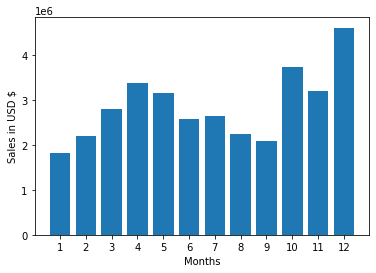

In [209]:
sales_by_months = data.groupby('Month').sum()
month_range = range(1,13)
plt.bar(month_range, sales_by_months['Sales'])
plt.xticks(month_range)
plt.ylabel('Sales in USD $')
plt.xlabel('Months')
plt.show()

##### Remove 1e^6 from the y-axis and make it come along the data-points on y-axis

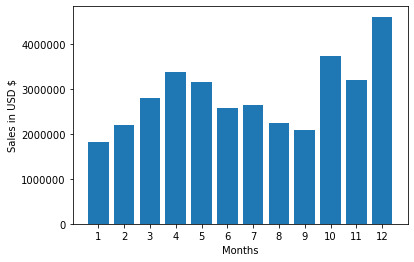

In [210]:
sales_by_months = data.groupby('Month').sum()
month_range = range(1,13)
plt.bar(month_range, sales_by_months['Sales'])
plt.xticks(month_range)
plt.ylabel('Sales in USD $')
plt.xlabel('Months')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

##### Extract city name from the information available in the address column

In [211]:
#here index is based on the split by comma, the city name and state name is at index '1'   
#getting city and state name column because there can be many cities with the same name 
def city_name(address):
    return address.split(',')[1]

def state_name(address):
    return address.split(',')[2].split(' ')[1]

# f"{variable} ____string____{variable} "  Another way of printing in python without using the + operator

data['City'] = data['Purchase Address'].apply(lambda x: f"{city_name(x)} ({state_name(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### City-wise Sales Performance

In [212]:
sales_by_city = data.groupby('City').sum()
sales_by_city

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


##### Warning if you use groupby with different columns it will behave differently compared to unique(), as it happened for this case where data showed sales are highest for San Francisco but the chart showed it to be highest for Portland(ME)  because the y-axis data is having order but the x-axis data which uses the unique command is not ordered.


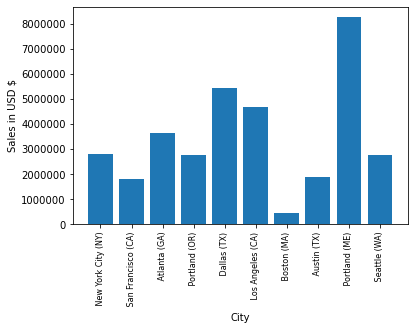

In [213]:
cities = data['City'].unique()
plt.bar(cities, sales_by_city['Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('City')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

##### Correcting it using list comprehension so that the cities are correctly grouped in the right order

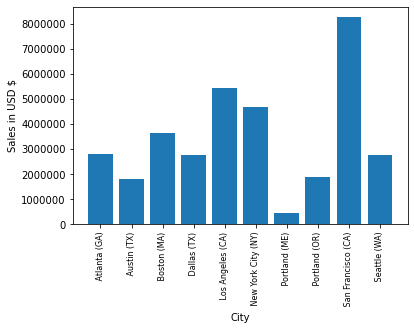

In [214]:
cities = [city for city, df in data.groupby('City')]
plt.bar(cities, sales_by_city['Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('City')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

### Time at which the advertisment should run so that customer product buying probability increases

In [215]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [216]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute

In [217]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


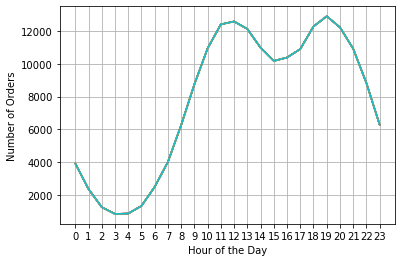

In [218]:
hours = [hour for hour, df in data.groupby('Hour')]
sales_count_by_hour = data.groupby(['Hour']).count()
plt.plot(hours, sales_count_by_hour)
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour of the Day')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

##### Based on the line chart, the peak hours of customer buying products are 11am and 7pm.

### Products Sold Together

##### Products with same order id would have sold together

In [219]:
df = data[data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


##### Grouping products with same order id in same line and adding them under a new column

In [220]:
df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/g0/w2th695n2dgcdm5shz2jz5740000gn/T/ipykernel_90100/602558810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [221]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Products
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


##### Looking at the data, each order id is repeated and has same grouped products. Now the duplicate rows of order id needs to be dropped

In [222]:
df = df[['Order ID','Grouped Products']].drop_duplicates()

In [223]:
df.head(20)

,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [224]:
from itertools import combinations
from collections import Counter

In [225]:
count = Counter()

for product in df['Grouped Products']:
    product_list = product.split(',')
    count.update(Counter(combinations(product_list,2))) #Most 2 products bought together

#top 10 products sold together in pairs of 2
for key, value in count.most_common(10):
    
    print(f"{key} = {value}")

('iPhone', 'Lightning Charging Cable') = 1005
('Google Phone', 'USB-C Charging Cable') = 987
('iPhone', 'Wired Headphones') = 447
('Google Phone', 'Wired Headphones') = 414
('Vareebadd Phone', 'USB-C Charging Cable') = 361
('iPhone', 'Apple Airpods Headphones') = 360
('Google Phone', 'Bose SoundSport Headphones') = 220
('USB-C Charging Cable', 'Wired Headphones') = 160
('Vareebadd Phone', 'Wired Headphones') = 143
('Lightning Charging Cable', 'Wired Headphones') = 92


### Most Sold Product

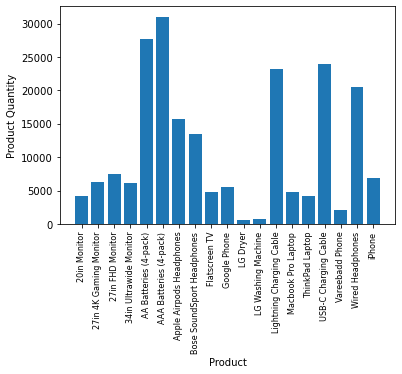

In [226]:
sales_by_product = data.groupby('Product')
product_quantity = sales_by_product.sum()['Quantity Ordered']
products = [product for product, df in sales_by_product]

plt.bar(products, product_quantity)

plt.xticks(products,rotation='vertical', size=8)
plt.ylabel('Product Quantity')
plt.xlabel('Product')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


##### Adding price of each product on the barplot 

/var/folders/g0/w2th695n2dgcdm5shz2jz5740000gn/T/ipykernel_90100/900170972.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


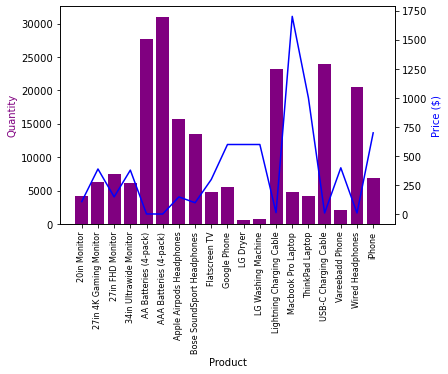

In [227]:
item_price = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_quantity, color='purple')
ax2.plot(products, item_price,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity', color='purple')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()